# a faster version of graph construction

In [2]:
% matplotlib widget
% load_ext autoreload
% autoreload 2

import numpy as np
import math

import sys
import matplotlib.pyplot as plt

from graph import *

In [3]:
from graph import vidc2graph

# Step 0 Test case

* `pert_pc_combine`

In [4]:
import open3d as o3d

test_idc = np.array([[0,0,0],[1,0,0],[2,0,0],[3,0,0],[3,1,0],[3,2,0],[3,3,0],[0,1,0],[0,2,0],[0,3,0],[0,0,1],[1,0,1],[2,0,1],[3,0,1],[3,1,1],[3,2,1],[3,3,1],[0,1,1],[0,2,1],[0,3,1]])

pert_pc = np.random.randn(*test_idc.shape)*0.1 + test_idc
pert_pc2 = np.random.randn(*test_idc.shape)*0.1 + test_idc
pert_pc_combine = np.vstack([pert_pc, pert_pc2])
print(pert_pc_combine)

[[ 2.96299180e-03 -7.72050775e-02 -6.26586695e-02]
 [ 9.57789318e-01  1.01212921e-01  1.36928792e-01]
 [ 1.98654040e+00  1.23062740e-01 -1.82351206e-01]
 [ 3.08726668e+00 -5.08761238e-02 -2.44442337e-01]
 [ 2.87769610e+00  1.06481921e+00 -1.25548286e-01]
 [ 2.92981044e+00  2.13144519e+00  1.15705962e-01]
 [ 2.99538768e+00  2.92194830e+00  1.36028327e-01]
 [-7.80445113e-02  8.95265332e-01  5.61945082e-02]
 [-3.69066017e-02  2.03676413e+00  6.12702909e-02]
 [ 3.89471933e-02  2.93484975e+00  3.31291351e-02]
 [ 2.91656842e-02  2.94385459e-02  1.02848482e+00]
 [ 9.54492250e-01  1.18214596e-01  1.07729183e+00]
 [ 2.17678639e+00  1.42093842e-01  9.22793001e-01]
 [ 3.09856219e+00 -1.31772257e-01  9.96961386e-01]
 [ 3.12237720e+00  8.07502628e-01  1.00607023e+00]
 [ 2.94028722e+00  2.11978095e+00  1.02392369e+00]
 [ 2.99867408e+00  2.95174522e+00  1.11005018e+00]
 [-3.74659553e-02  1.12570304e+00  8.63851582e-01]
 [ 6.88118849e-02  1.94498106e+00  1.01769368e+00]
 [-1.12770663e-01  3.06162043e+

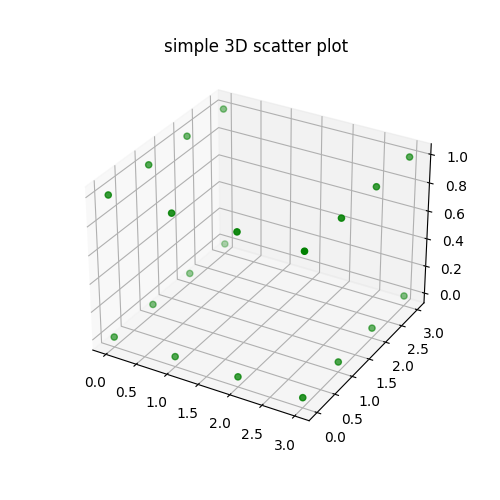

In [5]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x, y, z = zip(*test_idc)
 
# Creating figure
fig = plt.figure(figsize = (5, 5))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

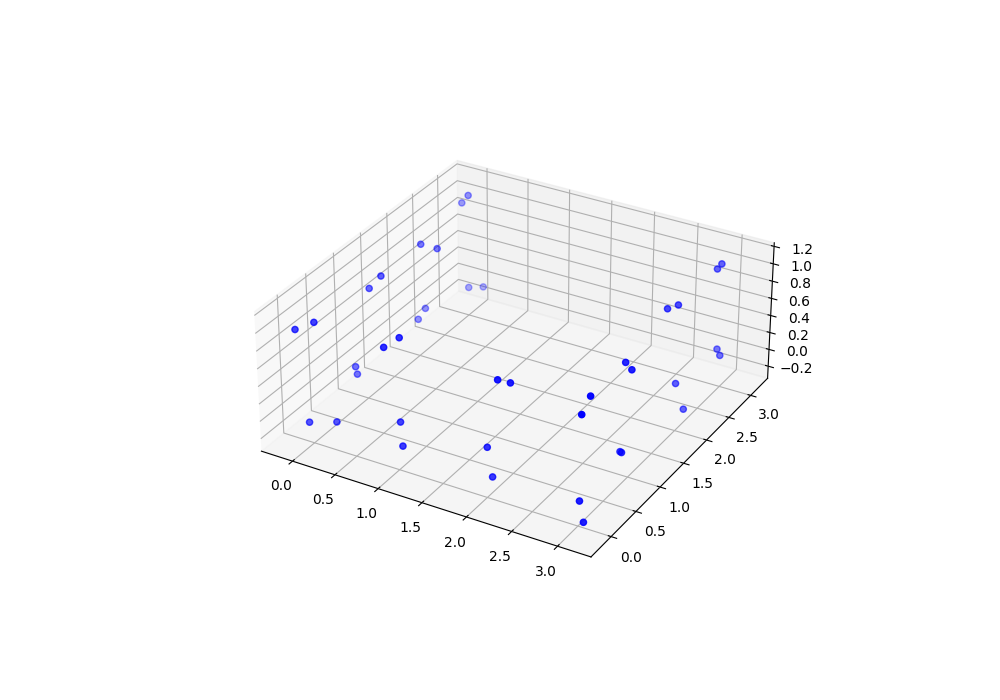

In [6]:
x, y, z = zip(*pert_pc_combine)
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "blue")
ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))

# show plot
plt.show()

# Step 1: Voxelization

In [10]:
pcd = o3d.geometry.PointCloud()
pcd.points=o3d.utility.Vector3dVector(pert_pc_combine)
size = 1
voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd,voxel_size = size)

# Collect Voxel Indices
voxels = voxel_grid.get_voxels()
vidc = np.zeros((len(voxels),3))
for i, vx in enumerate(voxels):
    vidc[i, :] = vx.grid_index
    
graph = vidc2graph(vidc)

In [ ]:
p2v = []

## Step 1.1 Visualize to check

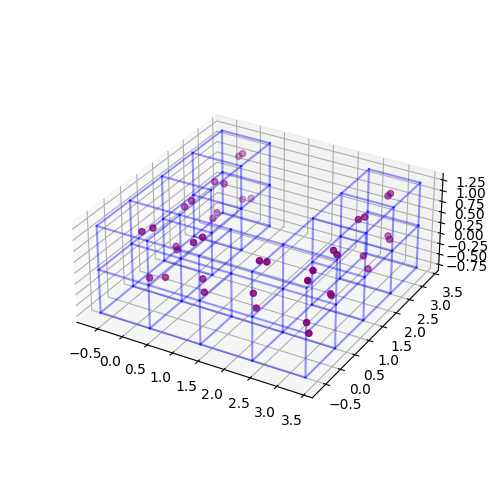

In [12]:
from itertools import product, combinations

fig = plt.figure(figsize = (5, 5))
ax = plt.axes(projection ="3d")
cube_edges = set()
for ind in vidc:
    bbp = np.asanyarray(voxel_grid.get_voxel_bounding_points(ind))
    for s, e in combinations(bbp, 2):
        if np.abs(np.sum(np.abs(s-e)) - size) < 0.1 :
            cube_edges.add(((tuple(s), tuple(e))))

for s, e in cube_edges:
    ax.plot3D(*zip(s,e), color='b', alpha=0.4)

ax.scatter3D(x, y, z, color = "purple")
ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))

plt.show()

# Step 2: Dijkstra Algorithm

In [13]:
graph = vidc2graph(vidc)
di = Dijkstra(graph)

In [14]:
di.dijkstra(0, False)

[0,
 1.4142135623730951,
 2.0,
 1.0,
 1.0,
 2.414213562373095,
 3.414213562373095,
 4.414213562373095,
 2.414213562373095,
 3.414213562373095,
 1.0,
 2.414213562373095,
 1.4142135623730951,
 1.4142135623730951,
 2.732050807568877,
 4.732050807568877,
 3.732050807568877,
 2.732050807568877,
 1.7320508075688772,
 3.732050807568877]

In [15]:
list(zip(di.dijkstra(0, False), vidc))

[(0, array([1., 0., 0.])),
 (1.4142135623730951, array([0., 1., 0.])),
 (2.0, array([3., 0., 0.])),
 (1.0, array([2., 0., 0.])),
 (1.0, array([0., 0., 0.])),
 (2.414213562373095, array([3., 1., 0.])),
 (3.414213562373095, array([3., 2., 0.])),
 (4.414213562373095, array([3., 3., 0.])),
 (2.414213562373095, array([0., 2., 0.])),
 (3.414213562373095, array([0., 3., 0.])),
 (1.0, array([1., 0., 1.])),
 (2.414213562373095, array([3., 0., 1.])),
 (1.4142135623730951, array([2., 0., 1.])),
 (1.4142135623730951, array([0., 0., 1.])),
 (2.732050807568877, array([3., 1., 1.])),
 (4.732050807568877, array([3., 3., 1.])),
 (3.732050807568877, array([3., 2., 1.])),
 (2.732050807568877, array([0., 2., 1.])),
 (1.7320508075688772, array([0., 1., 1.])),
 (3.732050807568877, array([0., 3., 1.]))]

# Now we successfully calculate geodist from 1 point to other
# Now we repeat the process and calculate the distance matrix

In [20]:
geo_dist_mat = np.zeros((len(vidc), len(vidc))) - 1 # [ ] TODO: suitable choice for mute entry
for i in range(len(vidc)):
    geo_dist_mat[i, :] = di.dijkstra(i)

In [21]:
geo_dist_mat

array([[0.        , 1.41421356, 2.        , 1.        , 1.        ,
        2.41421356, 3.41421356, 4.41421356, 2.41421356, 3.41421356,
        1.        , 2.41421356, 1.41421356, 1.41421356, 2.73205081,
        4.73205081, 3.73205081, 2.73205081, 1.73205081, 3.73205081],
       [1.41421356, 0.        , 3.41421356, 2.41421356, 1.        ,
        3.82842712, 4.82842712, 5.82842712, 1.        , 2.        ,
        1.73205081, 3.73205081, 2.73205081, 1.41421356, 4.14626437,
        6.14626437, 5.14626437, 1.41421356, 1.        , 2.41421356],
       [2.        , 3.41421356, 0.        , 1.        , 3.        ,
        1.        , 2.        , 3.        , 4.41421356, 5.41421356,
        2.41421356, 1.        , 1.41421356, 3.41421356, 1.41421356,
        3.41421356, 2.41421356, 4.73205081, 3.73205081, 5.73205081],
       [1.        , 2.41421356, 1.        , 0.        , 2.        ,
        1.41421356, 2.41421356, 3.41421356, 3.41421356, 4.41421356,
        1.41421356, 1.41421356, 1.        , 2

## Average Distances (TODO)

In [57]:
samplepoints = pert_pc_combine[np.random.choice(range(len(pert_pc_combine)), len(pert_pc_combine)//2)]

distances=calc_point_pair_distances(samplepoints, pert_pc_combine, 1)
print(distances)
print(distances.shape) #should be 20 times 16

ValueError: cannot copy sequence with size 12 to array axis with dimension 40

In [58]:
pert_pc_combine

[autoreload of ec failed: Traceback (most recent call last):
  File "/Users/hoijanlai/.pyenv/versions/3.7.10/envs/pylab/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/hoijanlai/.pyenv/versions/3.7.10/envs/pylab/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/Users/hoijanlai/.pyenv/versions/3.7.10/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/hoijanlai/.pyenv/versions/3.7.10/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bo

array([[ 0.04988174, -0.19992655,  0.06472932],
       [ 0.99528869, -0.01783949,  0.11880499],
       [ 1.99572408, -0.01097733, -0.07269069],
       [ 3.13449504,  0.08452814, -0.09763225],
       [ 3.01468225,  0.81783073,  0.163189  ],
       [ 2.96969762,  1.99572969,  0.10268094],
       [ 2.84268998,  2.86915107,  0.08802492],
       [ 0.18228328,  0.96906364,  0.0279878 ],
       [ 0.03525739,  2.00083612, -0.14226066],
       [ 0.08085825,  3.02348619, -0.18571562],
       [ 0.06962965, -0.06837511,  0.97852087],
       [ 1.04435482,  0.20245471,  0.96230484],
       [ 2.05659769,  0.03097016,  0.93123673],
       [ 2.95938374, -0.08084277,  0.99114211],
       [ 2.91897921,  1.0498111 ,  0.98454214],
       [ 2.95218206,  2.08385786,  1.02223615],
       [ 3.12430545,  2.86550534,  0.92620173],
       [-0.03762073,  1.01377475,  0.85833364],
       [ 0.09396919,  1.82805838,  0.93753763],
       [ 0.02108002,  3.00562714,  0.9931227 ],
       [-0.10745446, -0.03237194, -0.064

In [79]:
from numba import jit
from numba.typed import Dict

@jit(nopython=True)
def dijkstra(s, graph, report=False):
#     if s not in graph.keys():
#         return None
    distances = Dict()
    visited = Dict()
    hq = []
    for v in graph.keys(): 
        distances[v] = math.inf
        visited[v] = False

    distances[s], visited[s] = 0, False # initialize the distance for the start vertex, and the visibility for the start vertex. 
    heappush(hq, (0, s))

    while hq:
        (d, v) = heappop(hq)
        visited[v] = True

        for edge in graph[v]: # edge ~ (dist, vert)
            dist2end, end_v = edge
            if (not visited[end_v]) and (dist2end + d < distances[end_v]):
                distances[end_v] = dist2end + d 
                heappush(hq, (distances[end_v], end_v))
#     if report:
#         print(f"Starting at: {s}...", 
#               ''.join(['' if val==0 else f"\nthe s.d. to {key} = {val:.4f}" for key, val in distances.items()]), 
#               "\n")
    return distances

In [80]:
dijkstra((0, 0, 0), graph, True)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at <ipython-input-79-544c510e029e> (7)[0m
[1m
File "<ipython-input-79-544c510e029e>", line 7:[0m
[1mdef dijkstra(s, graph, report=False):
    <source elided>
#         return None
[1m    distances = dict()
[0m    [1m^[0m[0m 

This error may have been caused by the following argument(s):
- argument 1: [1mCannot determine Numba type of <class 'dict'>[0m


In [91]:
p1 = xyz([1,2,3])
p2 = xyz([2,3,4])



xyz([[[2.43, 0.77, 2.43],
      [6.16, 7.82, 0.77]]])

In [ ]:
##